#MNIST CLASSIFICATION

##Deep Learning Supervised Learning

Import reqiured modules and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf           #to create neural network
from tensorflow import keras      # keras is used to create layers
%matplotlib inline

Load Dataset from keras library

In [2]:
# X parameters to load images
# Y parameters to load labels

#training variable  testing variable
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# image and label are two things

print(len(X_train)) # to store image file
print(len(y_train)) # to store its label
print(len(X_test))  # to store image file
print(len(y_test))  # to store its label

60000
60000
10000
10000


In [4]:
X_train.shape
X_test.shape

# y_train | y_test don't show resolution cause they are labels
# Resolution of all images are same (28,28)

(10000, 28, 28)

In [5]:
#matrix form of first image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

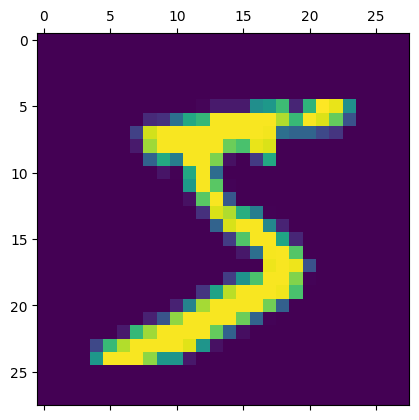

In [6]:
# Image of above matrix
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

##Flattening
  All rows of image are arranged into a single column
  
  Now its 1 dimension array

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [12]:
# This is the flattened matrix of a single data at index 0
# There will be matrix like these for each of other images
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##Neural networking

Layer Creation

In [13]:
model = keras.Sequential(
    [
        keras.layers.Dense(15, input_shape=(784,), activation="sigmoid"),    # Created a layer

        keras.layers.Dense(45, activation="sigmoid"),    # Created a hidden layer
        keras.layers.Dense(55, activation="sigmoid"),    # Created a hidden layer
        keras.layers.Dense(45, activation="sigmoid"),    # Created a hidden layer

        keras.layers.Dense(10, activation="sigmoid")    # Created a hidden layer

        # Provide activation functions for each layer
        # Number of nodes in that layer = (Numbers in images: 0 - 9)
        # input_shape provided only in input layer
        # last layer must only have 10
    ]
)
# Here we take input and ouput layer same so give 10
  # else input layer can be less than 10

Compilation

In [14]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Training Model

In [15]:
# Training model
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1100 - accuracy: 0.6513
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4362 - accuracy: 0.8767
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3400 - accuracy: 0.9029
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.9162
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2559 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2317 - accuracy: 0.9331
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2142 - accuracy: 0.9373
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1996 - accuracy: 0.9415
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1905 - accuracy: 0.9437
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.181

Testing

In [16]:
# Testing Data
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2154 - accuracy: 0.9374


[0.21540986001491547, 0.9373999834060669]

Prediction

In [17]:
#Predict values inside X_test_flattened
x_predicted = model.predict(X_test_flattened)


# Prediction on first element when compared to 0 - 9
x_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([5.9858151e-02, 3.5491598e-01, 3.7517962e-01, 5.3887731e-01,
       3.1017967e-02, 1.1470066e-01, 2.7693251e-05, 9.9942970e-01,
       1.4420258e-02, 5.4299217e-01], dtype=float32)

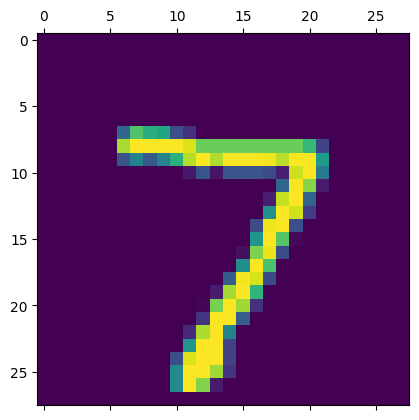

In [18]:
# Just reviewing  first element in testing set

plt.matshow(X_test[0])

In [19]:
# Checking predicted Value
x_predicted_labels = [np.argmax(i) for i in x_predicted]


In [20]:
x_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
# Most predicted value
np.argmax(x_predicted[0])

7

Confusion Matrix

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=x_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    3,    1,    2,    4,    9,    3,    0,    0],
       [   0, 1101,    6,    2,    0,    2,    1,    2,   21,    0],
       [  11,    5,  955,   12,    5,    5,   18,   12,    9,    0],
       [   2,    4,   30,  905,    0,   45,    0,   18,    4,    2],
       [   2,    0,    2,    0,  928,    1,   10,    2,    2,   35],
       [   7,    1,    3,   26,    4,  805,    4,    2,   21,   19],
       [  19,    2,    3,    0,    6,   12,  907,    0,    9,    0],
       [   0,    6,   14,    7,    4,    3,    0,  972,    1,   21],
       [   3,    4,    3,    5,   19,   24,    8,    5,  896,    7],
       [   4,    0,    0,    2,   28,   16,    1,    6,    5,  947]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

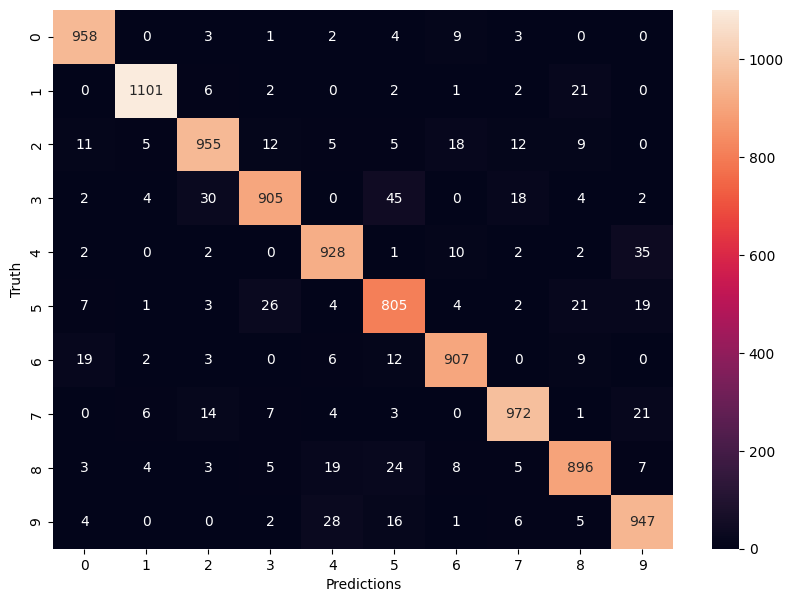

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt="d")

plt.xlabel("Predictions")
plt.ylabel("Truth")

Learning rate
Batch size
Number of epochs
Hidden leyers
Activation function